In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [45]:
os.getcwd()

'/Users/gardar/Documents/UCL/ELEC0054 IMLS Research Project/04 Implementation/03 Hydraulic Simulations'

In [46]:
files = sorted(glob.glob('studies/logs/*.csv'))

In [47]:
names = [filename.replace('studies/logs/','').replace('.csv','') for filename in files]

In [48]:
df_dict = {key:value for (key,value) in zip(names,[pd.read_csv(file,index_col='Unnamed: 0') for file in files])}

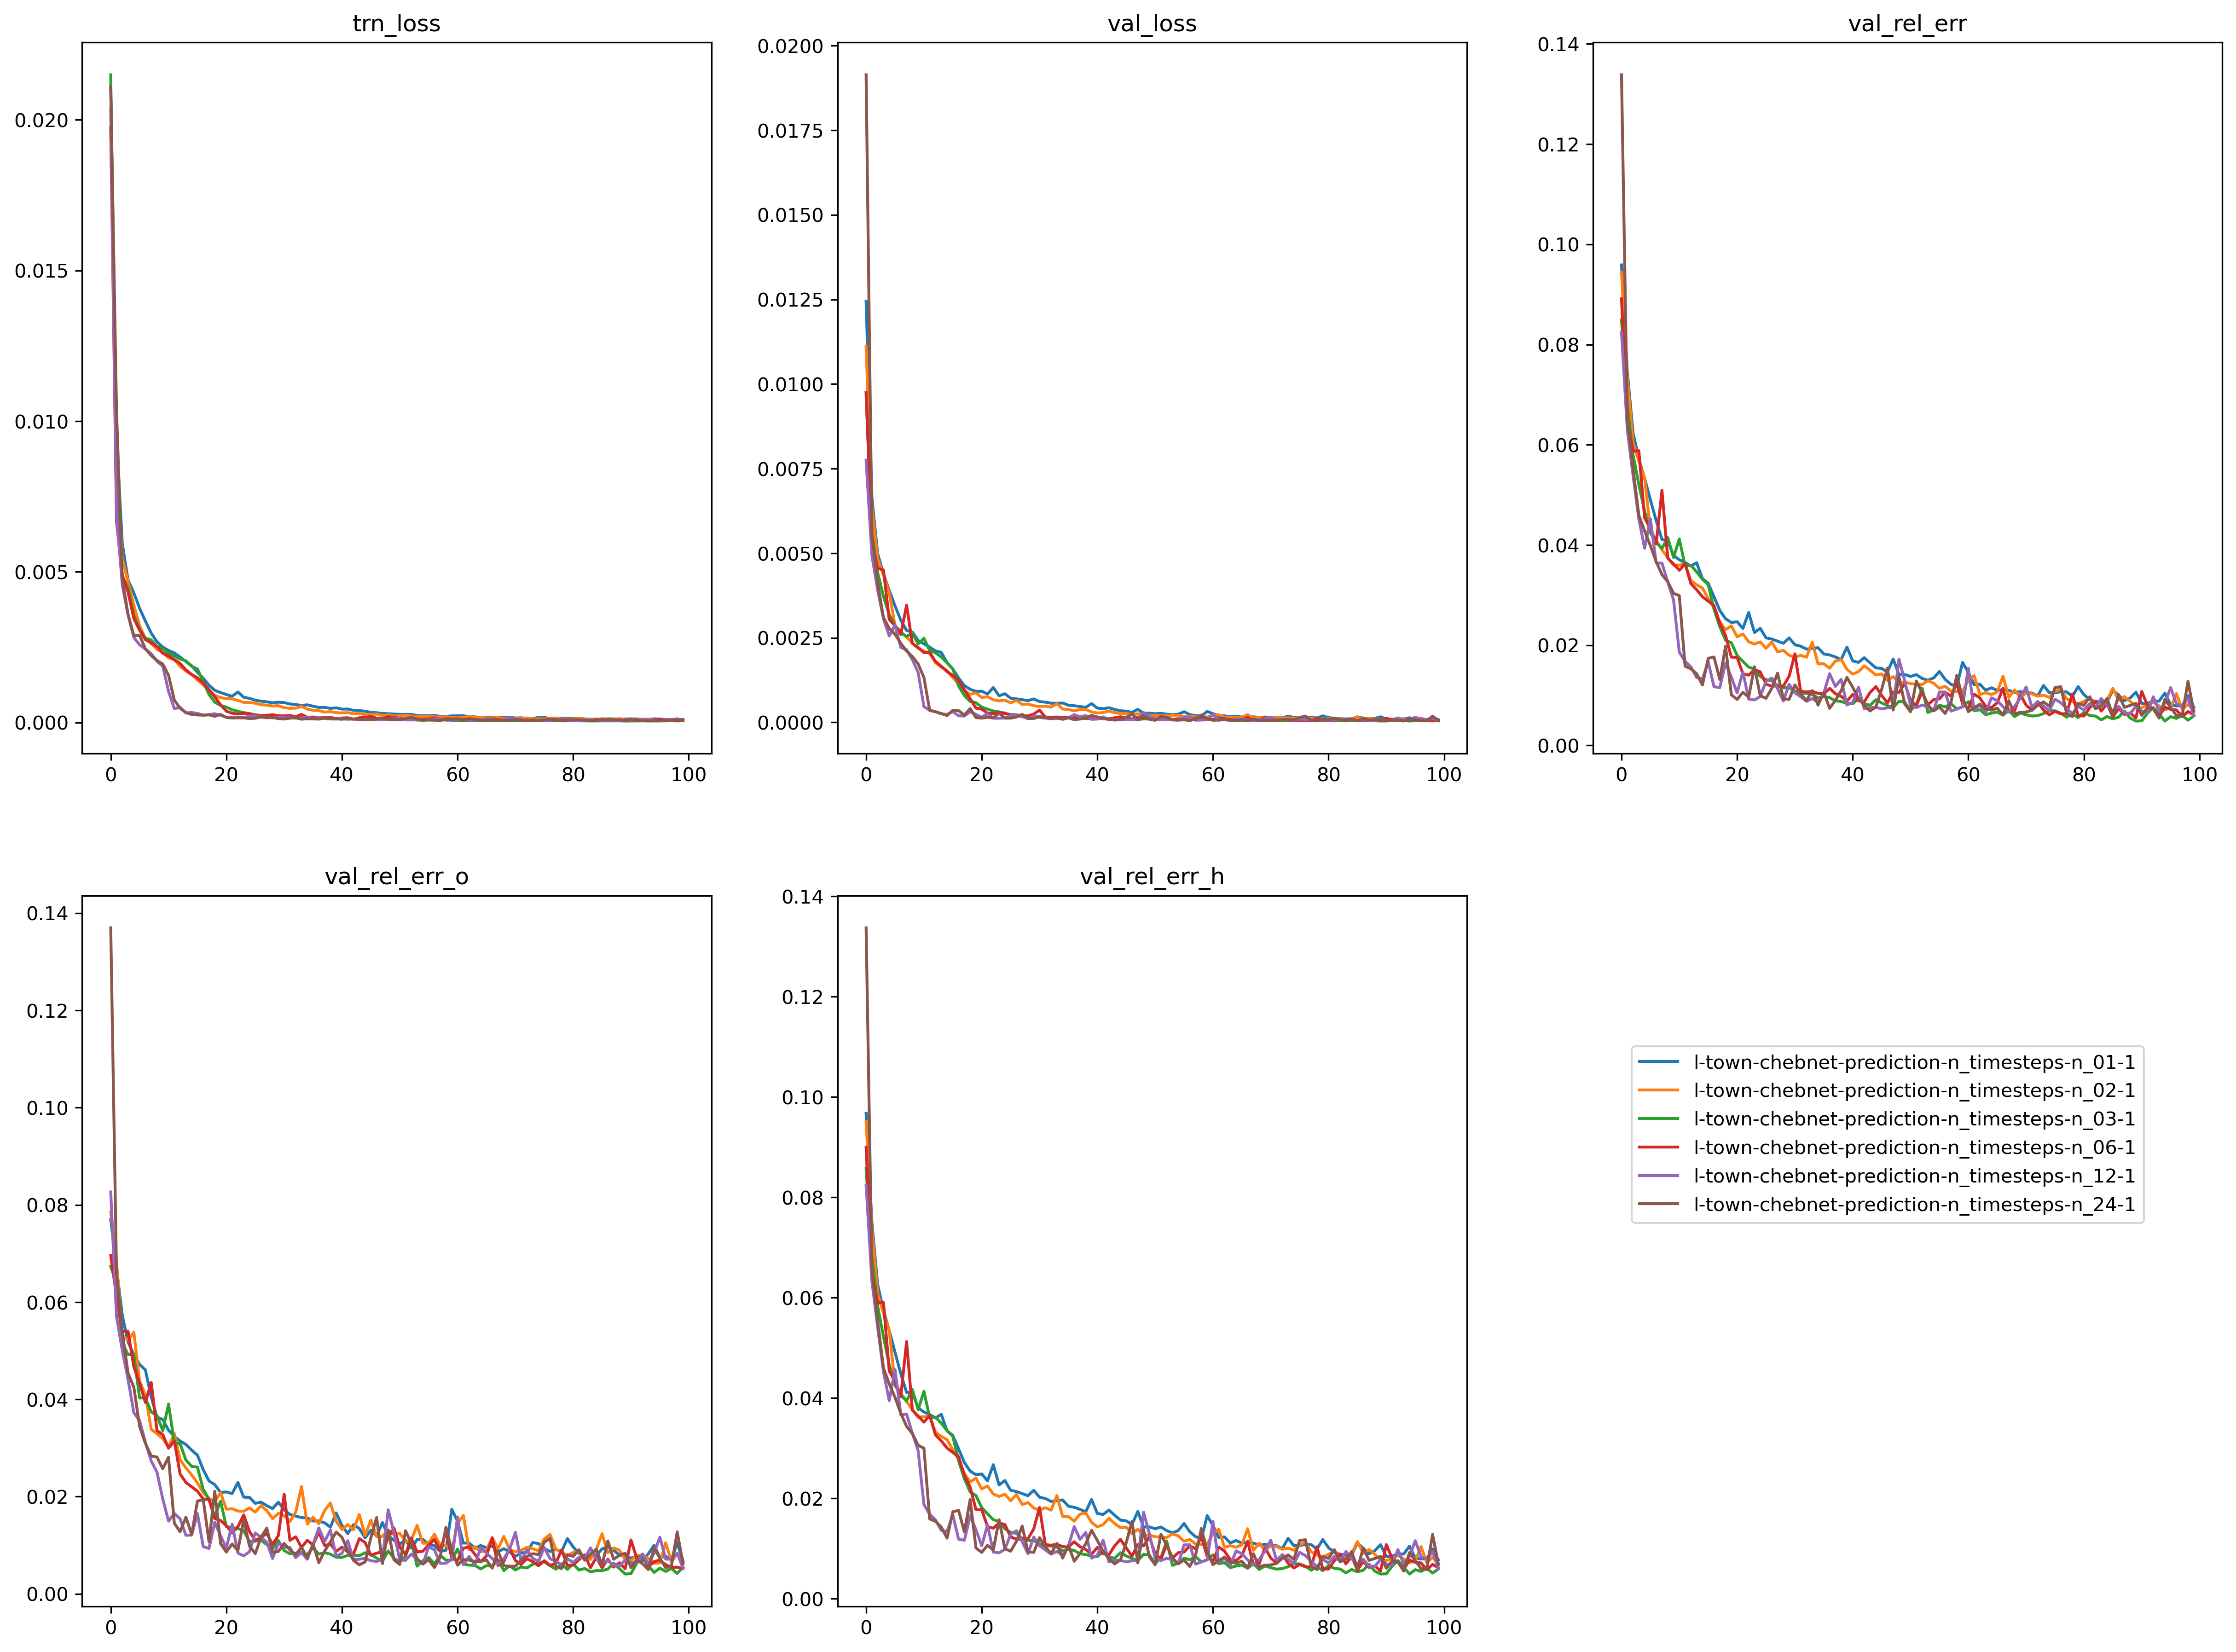

In [49]:
fig,ax = plt.subplots(nrows=2, ncols=3, figsize=(20,15), dpi=300)

for line,axis in zip(df_dict[names[0]].columns, ax.ravel()):
    for key,val in df_dict.items():
        axis.plot(val[line], label = key)
    axis.set_title(line)

handles, labels = axis.get_legend_handles_labels()
by_label        = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.375, -0.1, 0.5, 0.5))
fig.delaxes(ax[1,2])
plt.show()

In [50]:
best_loss={}
for key,df in df_dict.items():
    best_loss[key]=df.min()

In [51]:
best_loss

{'l-town-chebnet-prediction-n_timesteps-n_01-1': trn_loss         0.000093
 val_loss         0.000083
 val_rel_err      0.007654
 val_rel_err_o    0.006826
 val_rel_err_h    0.007690
 dtype: float64,
 'l-town-chebnet-prediction-n_timesteps-n_02-1': trn_loss         0.000087
 val_loss         0.000069
 val_rel_err      0.006915
 val_rel_err_o    0.006302
 val_rel_err_h    0.006929
 dtype: float64,
 'l-town-chebnet-prediction-n_timesteps-n_03-1': trn_loss         0.000051
 val_loss         0.000041
 val_rel_err      0.004870
 val_rel_err_o    0.004080
 val_rel_err_h    0.004895
 dtype: float64,
 'l-town-chebnet-prediction-n_timesteps-n_06-1': trn_loss         0.000059
 val_loss         0.000046
 val_rel_err      0.005516
 val_rel_err_o    0.005178
 val_rel_err_h    0.005531
 dtype: float64,
 'l-town-chebnet-prediction-n_timesteps-n_12-1': trn_loss         0.000063
 val_loss         0.000047
 val_rel_err      0.005931
 val_rel_err_o    0.005297
 val_rel_err_h    0.005959
 dtype: float64,


In [52]:
names

['l-town-chebnet-prediction-n_timesteps-n_01-1',
 'l-town-chebnet-prediction-n_timesteps-n_02-1',
 'l-town-chebnet-prediction-n_timesteps-n_03-1',
 'l-town-chebnet-prediction-n_timesteps-n_06-1',
 'l-town-chebnet-prediction-n_timesteps-n_12-1',
 'l-town-chebnet-prediction-n_timesteps-n_24-1']

In [53]:
short_names=['pred_t-1','pred_t-2','pred_t-3','pred_t-6','pred_t-12','pred_t-24','rec_wo_mask','rec_w_mask']

/opt/anaconda3/envs/GSP/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


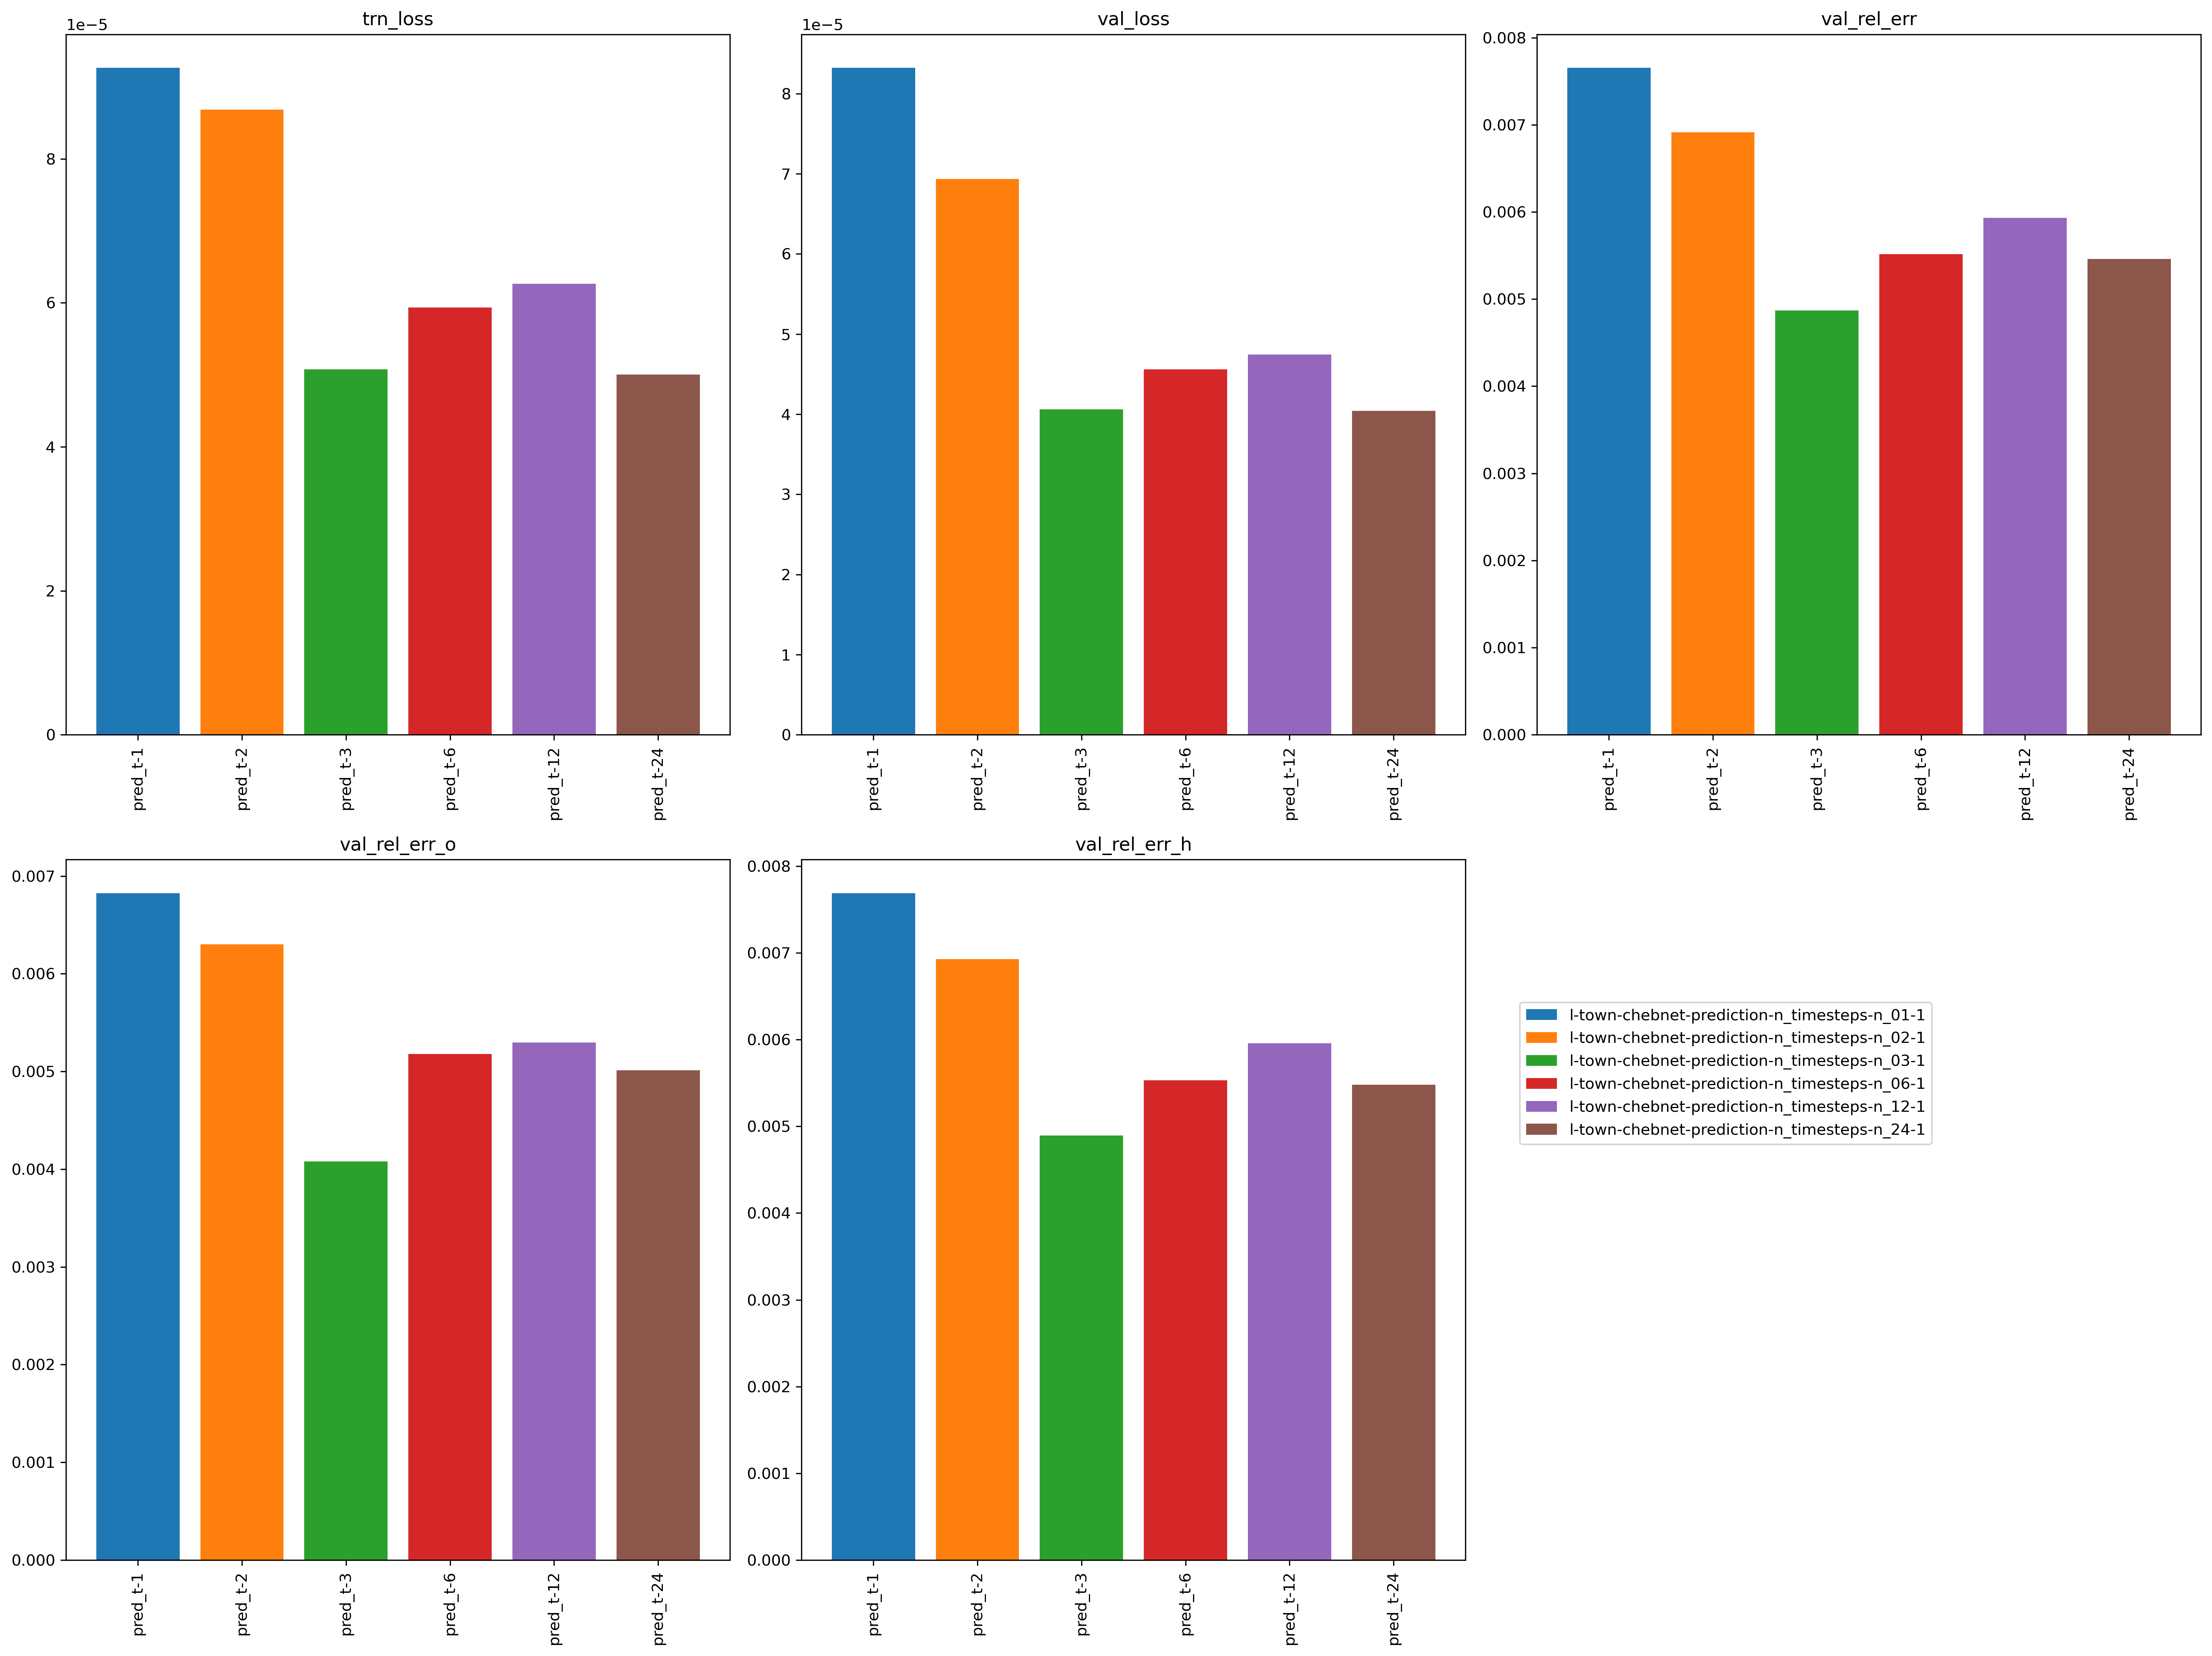

In [54]:
fig,ax = plt.subplots(nrows=2, ncols=3, figsize=(20,15), dpi=300)

for line,axis in zip(df_dict[names[0]].columns, ax.ravel()):
    for key,val in best_loss.items():
        axis.bar(x=key, height=val[line], label = key)
    axis.set_title(line)
    axis.set_xticklabels(short_names,rotation=90)

handles, labels = axis.get_legend_handles_labels()
by_label        = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.375, -0.1, 0.5, 0.5))
fig.delaxes(ax[1,2])
plt.tight_layout()
plt.show()